In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
#from qiskit.circuit.library import RGQFTMultiplier
from qiskit.circuit.library import Permutation
#from qiskit.circuit.library import QFT

#import numpy as np
#import matplotlib.pyplot as plt
#from qiskit.aqua.components.uncertainty_models import NormalDistribution, UniformDistribution, LogNormalDistributio
#from qiskit_finance.circuit.library.probability_distributions import NormalDistribution, UniformDistribution,LogNormalDistribution

In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)

Permutation with pattern 7,0,6,1,5,2,4,3

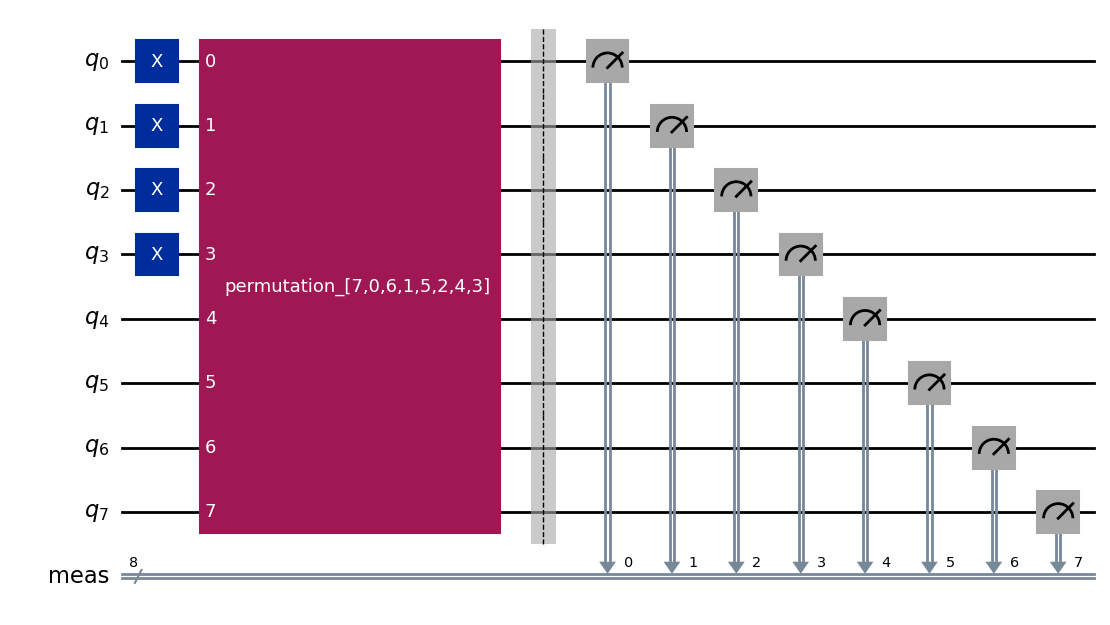

In [3]:
#initializing  quantum circuit
qc = QuantumCircuit(8)   #N = 8 qubit. N=8 classical bits



#building the circuit

#Apply  X-gate into q0, q1, q2, q3

qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)

#Apply permutations in the circuit from Permutation function

qc = qc.compose(Permutation(num_qubits = 8, pattern=[7,0,6,1,5,2,4,3]))

#Measuring...

qc.measure_all()

#printing...

qc.draw("mpl")

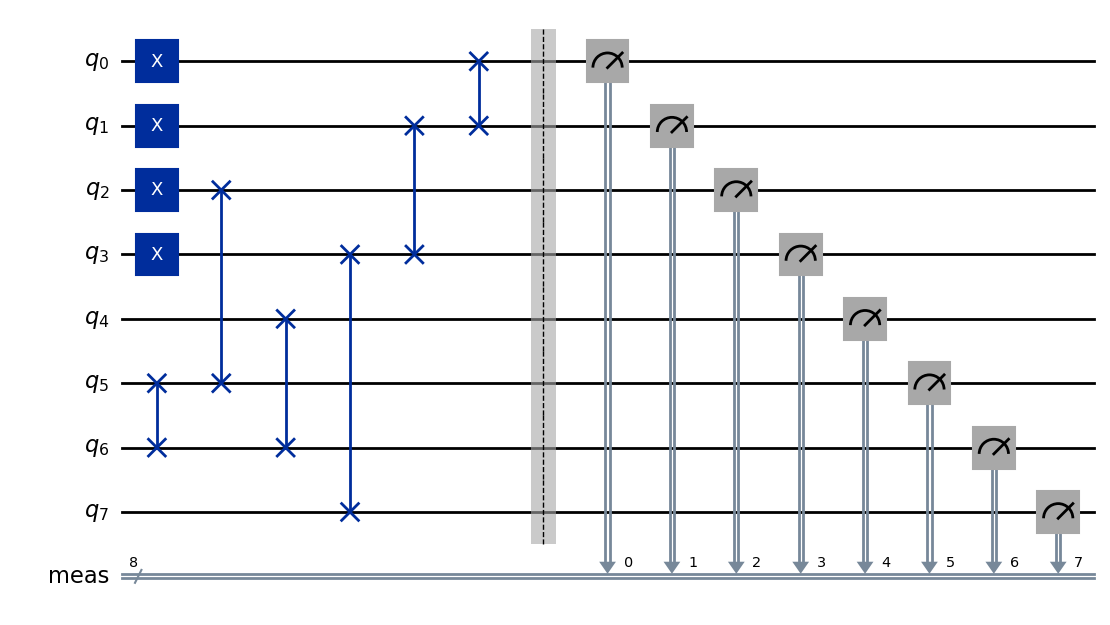

In [4]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [5]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
#counts
print('RESULT ', counts)

RESULT  {'10101010': 1000}


##########Random Permutation Circuit###############

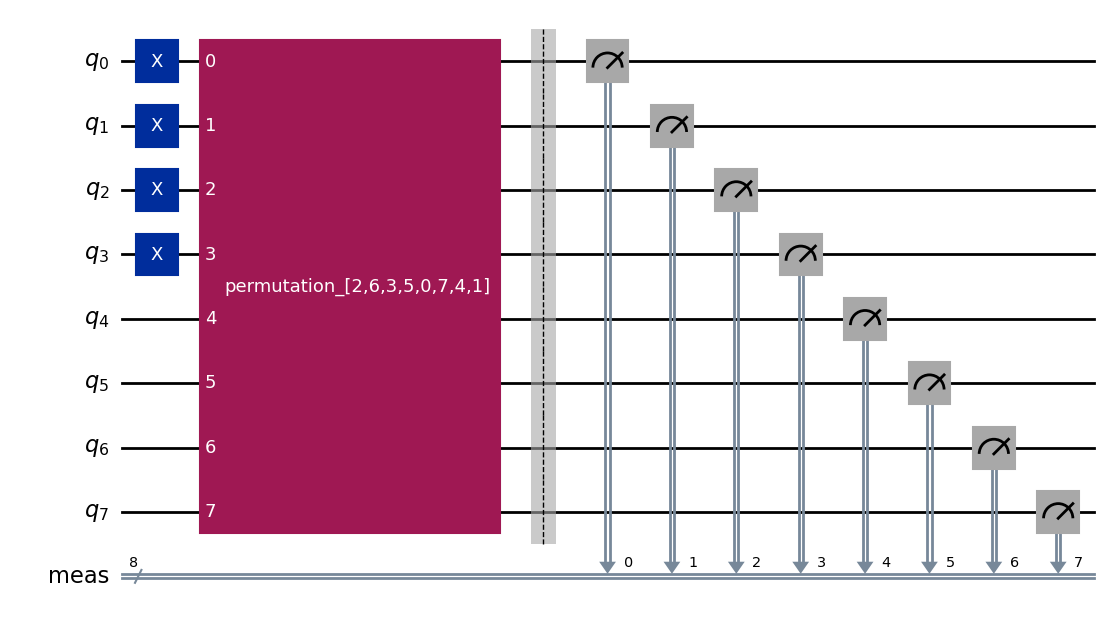

In [6]:
#restart the circuit 

qc = QuantumCircuit(8)#N = 8 qubits. N= 8 classical bits
#building the circuit

#Apply X-gate to q0, q1, q2, q3

qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)

#Apply permutations in the circuit from the function Permutation()

qc = qc.compose(Permutation(num_qubits = 8)) #Note that the partern was not specified. So it is randon

#Measure

qc.measure_all()

#print

qc.draw("mpl")


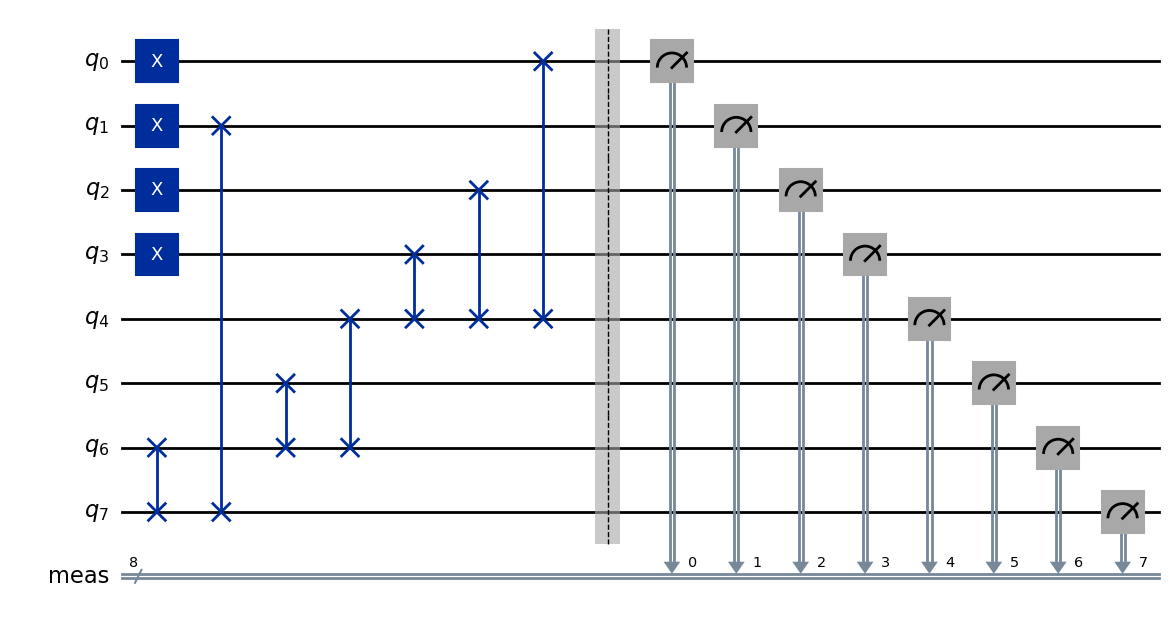

In [7]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [8]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
#counts
print('RESULT ', counts)

RESULT  {'10010101': 1000}
